## Introduction

A figure is made of several `matplotlib.axes` objects, also called 'ax'. These can be placed in the figure in a special order. In this part, two approaches of axes layout are presented:

1. Simple approach: create a grid of `axes` objects, where all have the same dimensions
2. Advanced approach: define custom dimensions for each `axe`


## Simple approach



### Using an iterable

Using `plt.subplots`, axes are available in a 2D `numpy` array.

Let's:

- create 3 axes along columns and 2 along rows, i.e. an array of shape (2, 3)
- use of the axes to plot something.

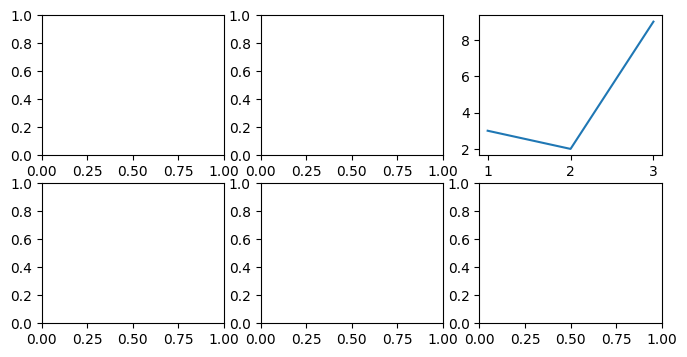

In [17]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 4))
ax = axes[0, 2]           # access the first row and third column
ax.plot([1,2,3], [3,2,9])

### Using a dictionary

`plt.subplot_mosaic` is similar to `plt.subplots` yet it returns a dictionary whose keys are the names used in the passed iterable.

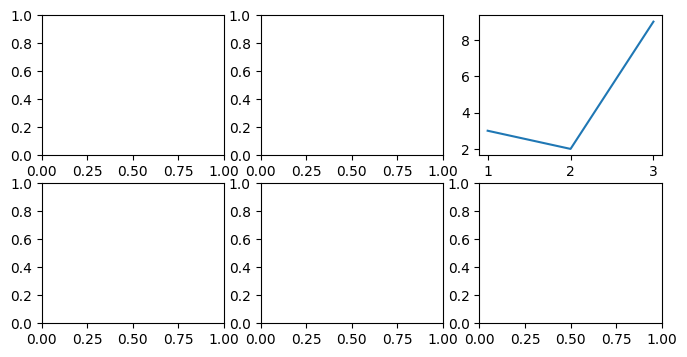

In [18]:
wanted_layout = [['ax1', 'ax2', 'ax3'], 
                 ['ax4', 'ax5', 'ax6']]
fig, axes = plt.subplot_mosaic(wanted_layout, 
                               figsize=(8,4))
ax = axes['ax3']
ax.plot([1,2,3], [3,2,9])

## Advanced approach

In the previous example, all axes had equal sizes. Let's create some axes with different sizes.


 

### Using an iterable

There are 3 steps:
 
 1. create the figure
 2. add to the figure a `GridSpec` instance using `add_gridspec`
 3. add axes one after another, specifying the rows and columns of the grid that axes must occupy.   
    This is done using the `add_subplot` function, which returns an __`axe`__ object.

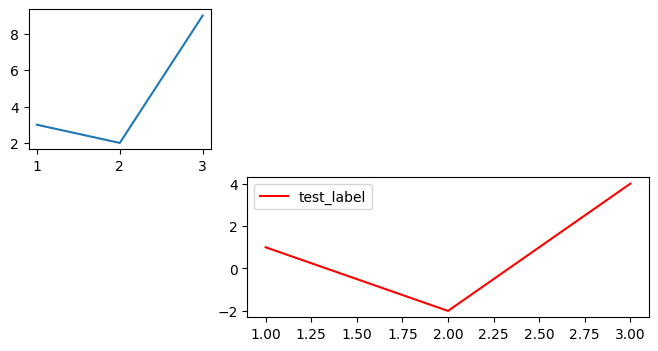

In [19]:
fig = plt.figure(figsize=(8, 4))
spec = fig.add_gridspec(2, 3)        # 2 rows, 3 columns: 
                                     # no more than 6 axes can be defined
                                     # but possibly less if some spans several
                                     # rows/columns

ax1 = fig.add_subplot(spec[0, 0])
_ = ax1.plot([1,2,3], [3,2,9])

ax2 = fig.add_subplot(spec[1, 1:3])  # 2nd row, from 2nd to 3rd column
ax2.plot([1,2,3], [1,-2,4], label='test_label', color='red')
_ = ax2.legend()

### Using a dictionary

In a dictionary approach (`subplot_mosaic`), one must set the same name in different places to have an axe span several rows/columns.

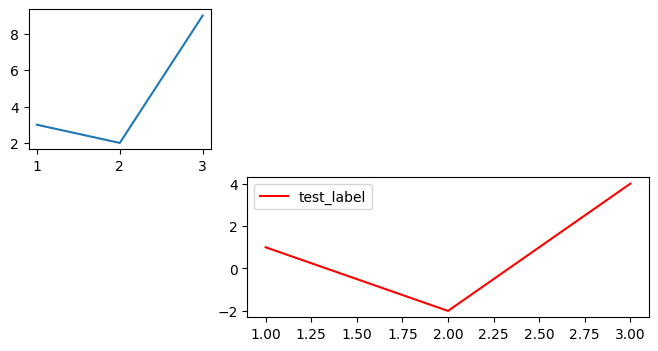

In [20]:
wanted_layout = [['ax1', '.', '.'],     # the dot '.' tells matplotlib                                         
                 ['.', 'ax6', 'ax6']]   # not to define axes at these locations
fig, axes = plt.subplot_mosaic(wanted_layout, 
                               figsize=(8,4))
ax1 = axes['ax1']
_ = ax1.plot([1,2,3], [3,2,9])

ax2 = axes['ax6']
ax2.plot([1,2,3], [1,-2,4], label='test_label', color='red')
_ = ax2.legend()

## Notes

The figure have some similar properties to those of the axes. For instance, let's define a title at the figure level using `suptitle`:

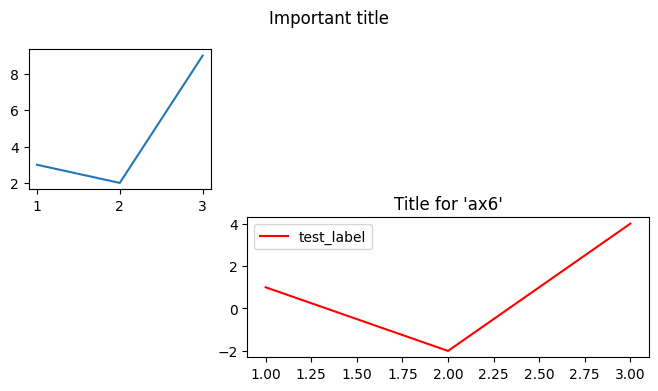

In [21]:
fig.suptitle('Important title')
ax = axes['ax6']
ax.set_title("Title for 'ax6'")
fig